In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [4]:
data = yf.download(tickers = "COKE",period = '15d')


[*********************100%***********************]  1 of 1 completed


In [4]:
data.keys()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

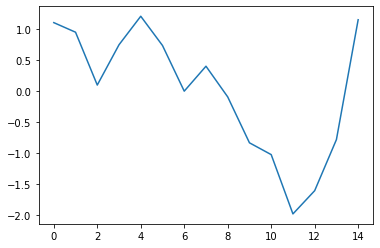

In [5]:
#plt.plot(data['Open'])

arr = np.array(data['Open'])
X = (arr - arr.mean())/arr.std()
plt.plot(X)

In [6]:
out_aapl = np.array(X).reshape(1,len(X),1)
inp_aapl = np.linspace(0,len(X),len(X)).reshape(1,len(X),1)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(256,return_sequences = True),
    tf.keras.layers.Dense(units = 1)
])

model.compile(loss =tf.keras.losses.MeanSquaredError(),optimizer = tf.keras.optimizers.Adam())


In [87]:
#model.fit

<bound method Model.fit of <keras.engine.sequential.Sequential object at 0x000001419F837730>>

In [102]:
train = model.fit(inp_aapl,out_aapl,epochs = 1000,batch_size= 1, verbose = 0)

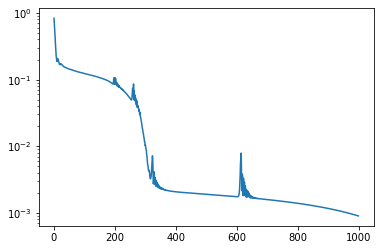

In [67]:
plt.plot(train.history['loss'])
plt.yscale("log")

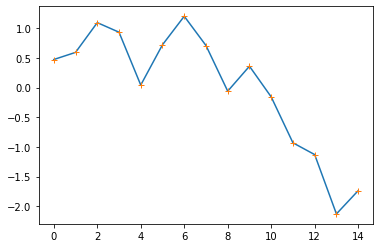

In [98]:
#plt.plot(data['Open'])

plt.plot(out_aapl[0,:,0])

plt.plot(AAPL_model.predict(inp_aapl)[0,:,0],"+")

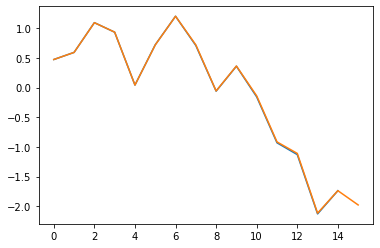

In [103]:
future = np.linspace(0,16,16).reshape(1,16,1)


plt.plot(out_aapl[0,:,0])

plt.plot(AAPL_model.predict(future)[0,:,0])

In [53]:
## TODO, write ML class which takes hyper-parameters 
## TODO, implement a general LSTM model , using windows.
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(256,return_sequences = True),
    tf.keras.layers.Dense(units = 1)
])

model.compile(loss =tf.keras.losses.MeanSquaredError(),optimizer = tf.keras.optimizers.Adam())


class Stock:
    
    """
    A class to represent a Stock timeseries with a randomly initizalied LSTM models outputting multiple predictions.
    
    ...
    
    Attributes
    ----------
    history : np.array
        Time series list of past stock prices
    N : int
        Number of random instantiations of initial weights.
        Multiple models are trained as a form of validation, to understand how robust the predictions are.
    lookahead : int
        Number of time steps into the future to predict
    epochs : int
        Number of training epochs per model.
    predictions : np.array of shape (N,lookahead + len(history))
        Model prediction of history time series plus lookahead steps into the future
    losses : np.array of shape (N, epochs)
        Training Losses
    stockname : String
        Name of stock
    
    Methods
    -------
    run(self):
        Trains multiple models and makes stock predictions.
    plot_losses(self,ax = None, title = "Loss",xlabel= "Epochs",ylabel="MSE",in_figsize = (5,5)):
        Plots the loss functions
        
    
    
    
    """
    def __init__(self, history, N, stockname, lookahead = 1, epochs = 1000):

        self.predictions = []
        self.input = np.linspace(0,len(history),len(history)).reshape(1,len(history),1)
        # Standardizing the price, for training purposes.
        self.history = ((history - history.mean())/history.std()).reshape(1,len(history),1)
        self.epochs = epochs
        self.losses = []
        self.lookahead = lookahead
        self.N = N
        self.stockname = stockname
        
        
    # TODO, implement a validation option which chooses to look at subsets of the stock price history.
    # e.g, predicts models looking back {15,14,13,12,11,10} time steps in the past. 
    # Motivation for this loosely said: we do not know how far back the relevent data is   
    def run(self):
        for i in range(self.N):
            model = tf.keras.Sequential([
                tf.keras.layers.LSTM(256,return_sequences = True),
                tf.keras.layers.Dense(units = 1)
            ]) ## TODO, replace this with more efficient initialization

            model.compile(loss =tf.keras.losses.MeanSquaredError(),optimizer = tf.keras.optimizers.Adam())

            
            train = model.fit(self.input,self.history,epochs = self.epochs, verbose = 0)
            
            n =  len(self.history[0,:,0])+self.lookahead
            
            future = np.linspace(0,n,n).reshape(1,n,1)
            self.predictions.append(model.predict(future))
            self.losses.append(train.history['loss'])
            
            
    
    def plot_losses(self,ax = None, title = "Loss",xlabel= "Epochs",ylabel="MSE",in_figsize = (5,5),log = True):
        if ax is None:
            fig, ax = plt.subplots(1,1,figsize=in_figsize)
        for elm in self.losses:
            ax.plot(elm)
        if log:
            ax.set_yscale("log")
        ax.set_title(title)
        ax.set_ylabel(ylabel)
        ax.set_xlabel(xlabel)
        
    # TODO, clean up and add input data.
    def plot_predictions(self,ax = None, title = "Model Predictions: ",xlabel= "Timestep",ylabel="Standardized Price",in_figsize = (5,5)):
        if ax is None:
            fig, ax = plt.subplots(1,1,figsize=in_figsize)
        for elm in self.predictions:
            ax.plot(elm[0,:-self.lookahead,0],'-k')
            ax.plot(np.linspace(len(self.history[0,:,0])-1,len(self.history[0,:,0]),self.lookahead+1),elm[0,-self.lookahead-1:,0])
        ax.set_title(title+ self.stockname)
        ax.set_ylabel(ylabel)
        ax.set_xlabel(xlabel)

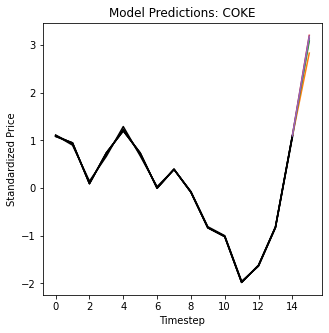

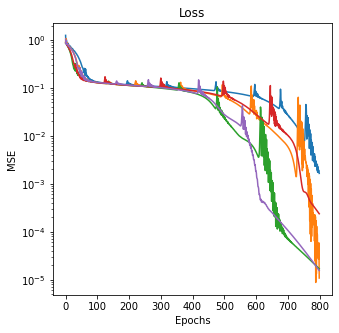

In [54]:
# NOTE: the input prices are in a very naive form now. Simply the oppening prices per day.
# Current inputs are purely for testing of class.
stck = Stock(arr,5,epochs = 800, stockname = "COKE")
stck.run()

stck.plot_predictions()
stck.plot_losses()

15